In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss

df = pd.read_csv('https://raw.githubusercontent.com/AlexEduardo-zip/ICD-NBA-data-analysis/main/final.csv')
df.head()

,Rk,Team,Year,Playoff Wins,MP,FG,FGA,FG%,3P,3PA,...,DRB%,FT/FGA.1,Arena,Attendance,Age,NRtg,TS%,Attend.,Attend./G,G
0,1,San Antonio Spurs,2003,16,14.0,16.0,27.0,4.0,11.0,11.0,...,17.0,3.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,New Jersey Nets,2003,14,26.0,17.0,18.0,14.0,23.0,22.0,...,6.0,14.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Dallas Mavericks,2003,10,24.0,3.0,2.0,7.0,2.0,2.0,...,19.0,10.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Detroit Pistons,2003,8,5.0,26.0,28.0,24.0,6.0,6.0,...,1.0,15.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sacramento Kings,2003,7,14.0,1.0,1.0,3.0,7.0,9.0,...,21.0,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN


'Rk': Classificação (ranking) da equipe.

'Team': Nome da equipe da NBA.

'G': Número de jogos disputados pela equipe.

'MP': Minutos médios jogados pela equipe por partida.

**'FG': Média de arremessos de campo bem-sucedidos por partida.**

**'FGA': Média de tentativas de arremessos de campo por partida.**

**'FG%': Porcentagem de acerto de arremessos de campo.**

'3P': Média de arremessos de três pontos bem-sucedidos por partida.

'3PA': Média de tentativas de arremessos de três pontos por partida.

**'3P%': Porcentagem de acerto de arremessos de três pontos.**

'2P': Média de arremessos de dois pontos bem-sucedidos por partida.

'2PA': Média de tentativas de arremessos de dois pontos por partida.

**'2P%': Porcentagem de acerto de arremessos de dois pontos.**

'FT': Média de lances livres bem-sucedidos por partida.

'FTA': Média de tentativas de lances livres por partida.

'FT%': Porcentagem de acerto de lances livres.

'ORB': Média de rebotes ofensivos por partida.

**'DRB': Média de rebotes defensivos por partida.**

'TRB': Média de total de rebotes por partida.

'AST': Média de assistências por partida.

'STL': Média de roubos de bola por partida.

'BLK': Média de tocos (bloqueios) por partida.

**'TOV': Média de turnovers (perdas de posse de bola) por partida.**

'PF': Média de faltas pessoais por partida.

'PTS': Média de pontos marcados por partida.

# **Intervalos de confiança**

Vamos observar as seguintes caracteristicas nos 30 melhores e 30 piores times do nosso dataset:


'FG%': Porcentagem de acerto de arremessos de campo.

'3P%': Porcentagem de acerto de arremessos de três pontos.

'2P%': Porcentagem de acerto de arremessos de dois pontos.

'DRB': Média de rebotes defensivos por partida.


In [39]:
df = df.sort_values(by='Playoff Wins',ascending=False)

Vamos olhar para os 30 primeiros e ultimos times e calcular um IC para as características mencionandas:


In [40]:
top_30_teams = df.head(30)
bottom_30_teams = df.tail(30)

A função abaixo toma um conjunto de times e calcula o intervalo de confiança para o rank dos times em uma determinada estatística:

In [41]:
def bootstrap_mean(df, sample, variable):
    # coluna de interesse
    percentage = df[variable]

    n_sample = sample

    sample_size = len(percentage)

    bootstrap_means = []

    #bootstrap
    for _ in range(n_sample):
        sample = np.random.choice(percentage, size=sample_size, replace=True)
        bootstrap_means.append(sample.mean())

    #limite do IC com 95%
    confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
    print("Intervalo de Confiança para", variable, ":", confidence_interval)

    #plot
    sns.histplot(bootstrap_means, kde=True)  #histograma e uma estimativa da densidade kernel kde
    sns.histplot(bootstrap_means, kde=True)  #histograma e uma estimativa da densidade kernel kde
    plt.axvline(confidence_interval[0], color='red', linestyle='--', label='LI')
    plt.axvline(confidence_interval[1], color='green', linestyle='--', label='LS')
    plt.xlabel('Média do rank de '+ variable)
    plt.ylabel('Densidade')
    plt.legend()
    plt.title('Distribuição da Média com Intervalo de Confiança (95%)')
    plt.show()


IC sobre o rank em FG%:

Intervalo de Confiança para FG% : [3.7        7.50083333]


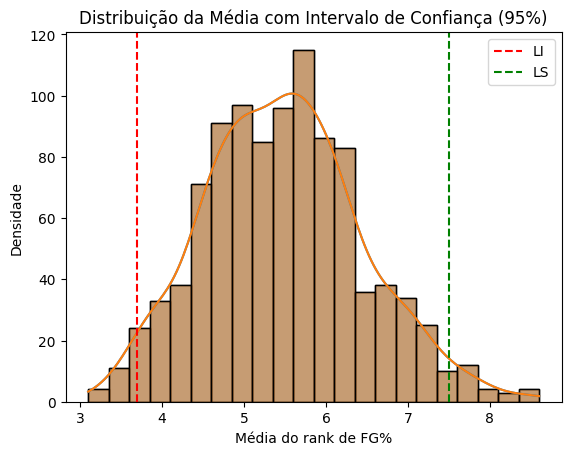

In [42]:
bootstrap_mean(top_30_teams, 1000, 'FG%')

Intervalo de Confiança para FG% : [11.99958333 17.58333333]


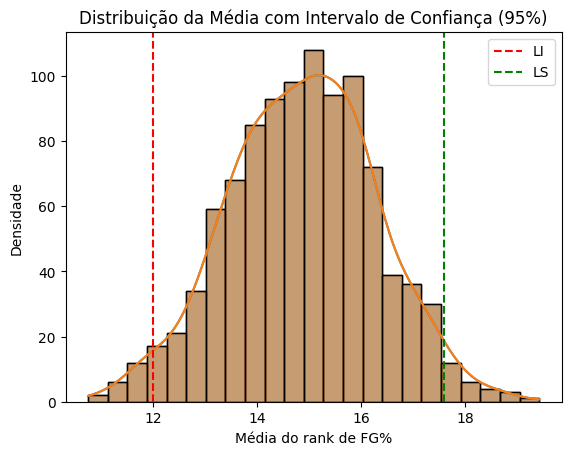

In [43]:
bootstrap_mean(bottom_30_teams, 1000, 'FG%')

IC sobre o rank em 3PT%:

Intervalo de Confiança para 3P% : [ 6.44958333 11.46666667]


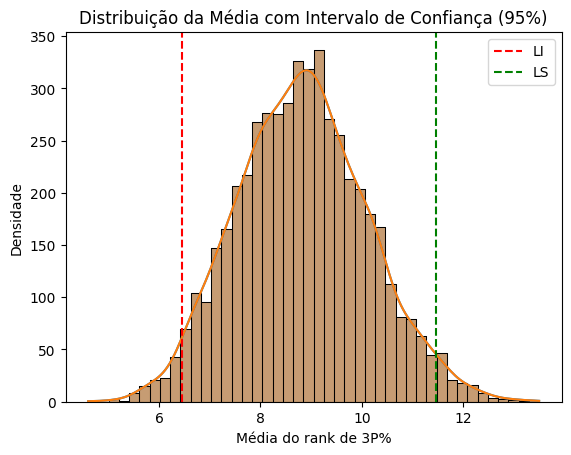

In [44]:
bootstrap_mean(top_30_teams, 5000, '3P%')

Intervalo de Confiança para 3P% : [12.58291667 18.45      ]


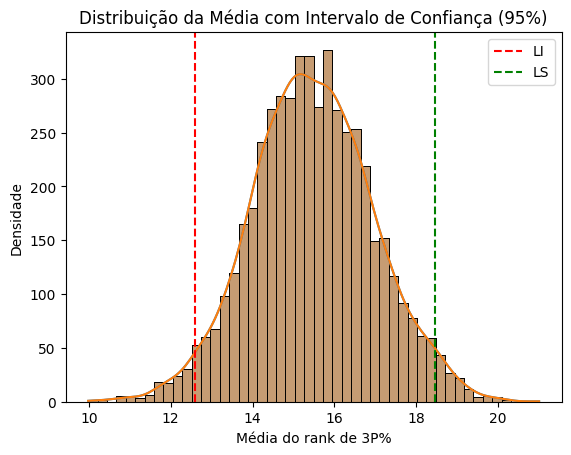

In [45]:
bootstrap_mean(bottom_30_teams, 5000, '3P%')

IC sobre o rank em rebotes:

Intervalo de Confiança para DRB : [5.81625    9.75041667]


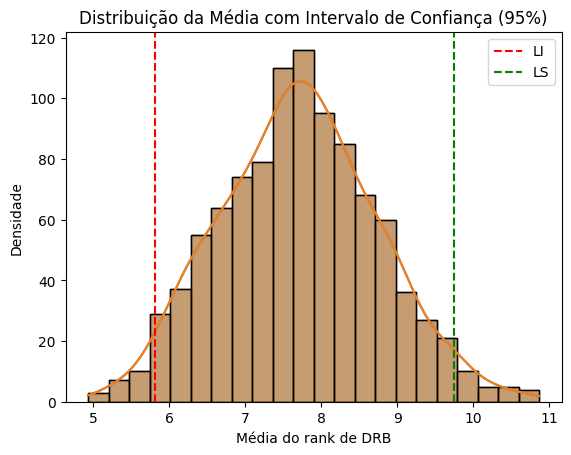

In [46]:
bootstrap_mean(top_30_teams, 1000, "DRB")

Intervalo de Confiança para DRB : [11.73083333 17.735     ]


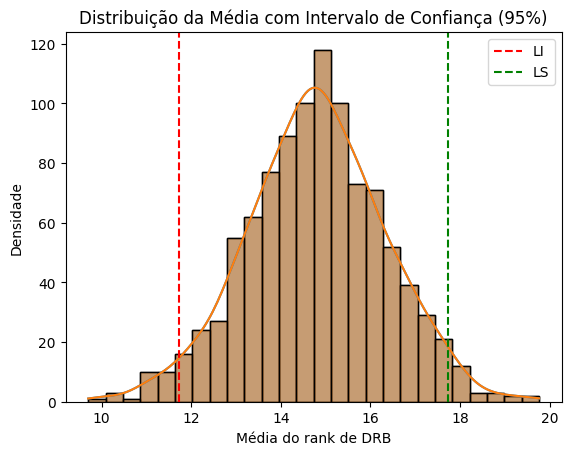

In [47]:
bootstrap_mean(bottom_30_teams, 1000, "DRB")

IC sobre o rank em 2P:

Intervalo de Confiança para 2P : [10.96666667 16.03375   ]


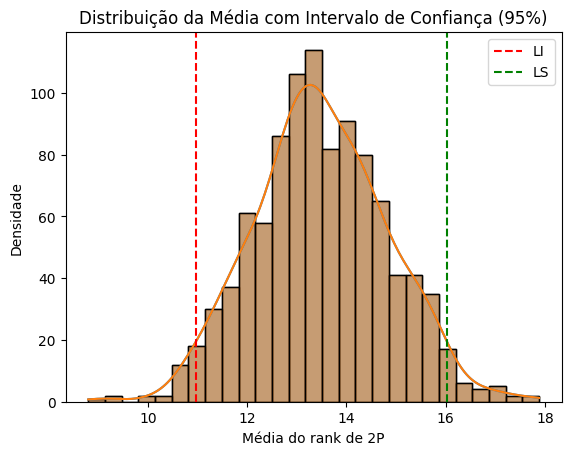

In [48]:
bootstrap_mean(top_30_teams, 1000, "2P")

Intervalo de Confiança para 2P : [11.76583333 17.88375   ]


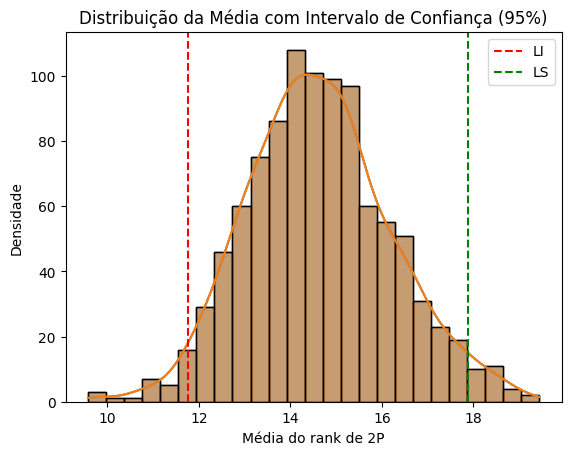

In [ ]:
bootstrap_mean(bottom_30_teams, 1000, "2P")